# CASE STUDY: FASHION CLASS CLASSIFICATION 
# Dr. Ryan Ahmed

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

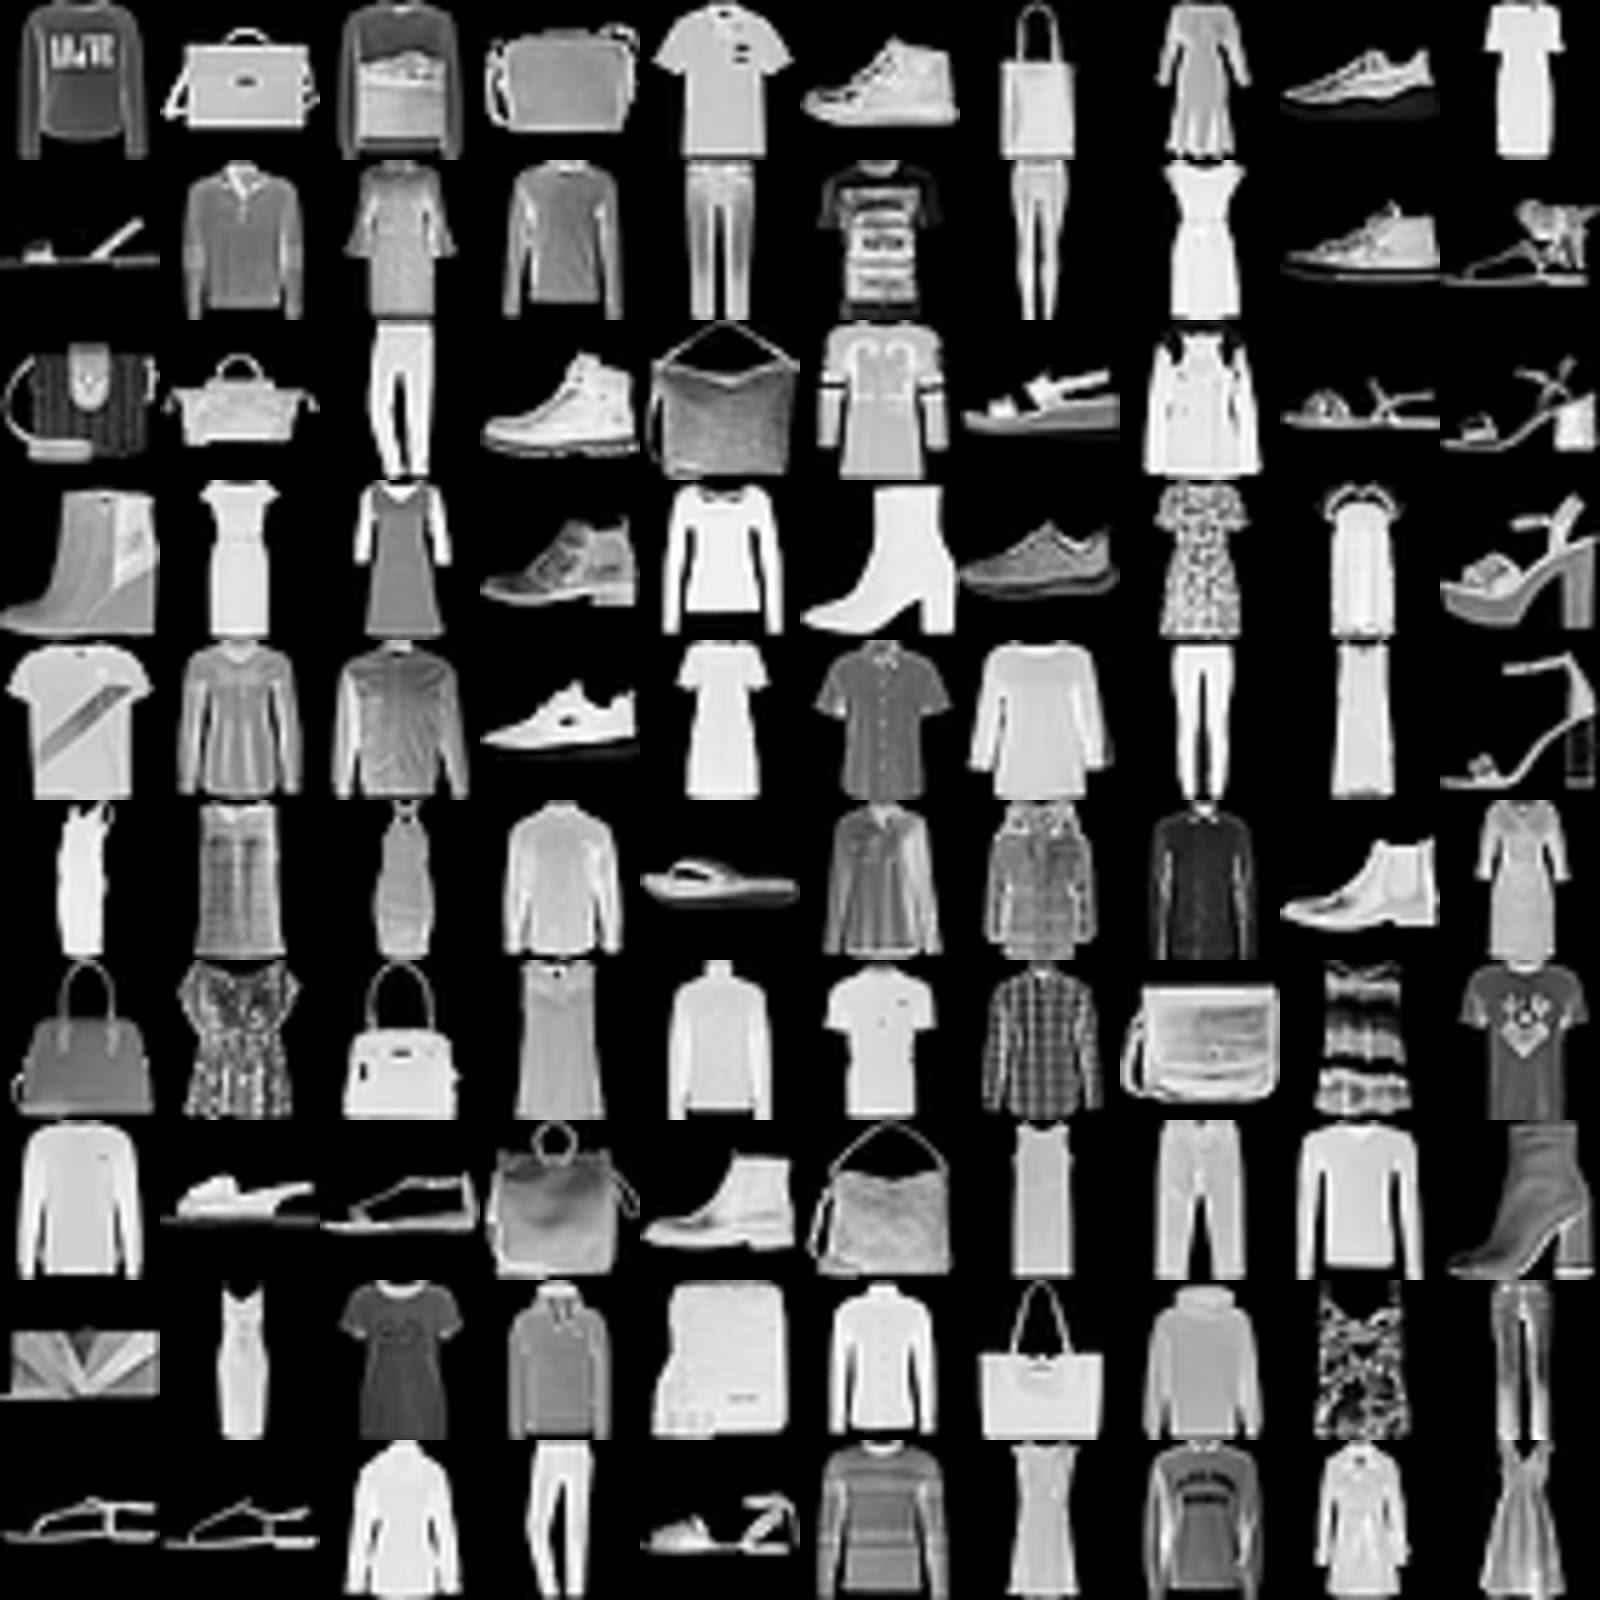


# STEP #2: IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

In [2]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# STEP #3: VISUALIZATION OF THE DATASET  

In [3]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Let's view the head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [7]:
print(fashion_train_df.shape)
print(fashion_test_df.shape)

(60000, 785)
(10000, 785)


In [8]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [9]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
map_dress = {
    "0": "T-shirt/top",
    "1": "Trouser",
    "2": "Pullover",
    "3": "Dress",
    "4": "Coat",
    "5": "Sandal",
    "6": "Shirt",
    "7": "Sneaker",
    "8": "Bag",
    "9": "Ankle boot",
}

Ankle boot 46588


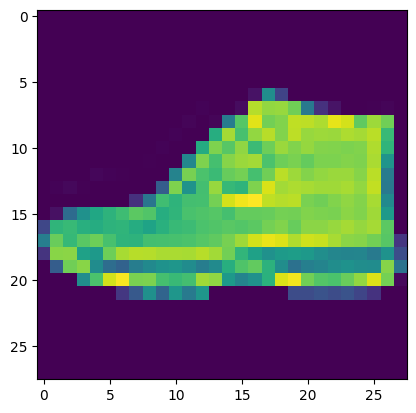

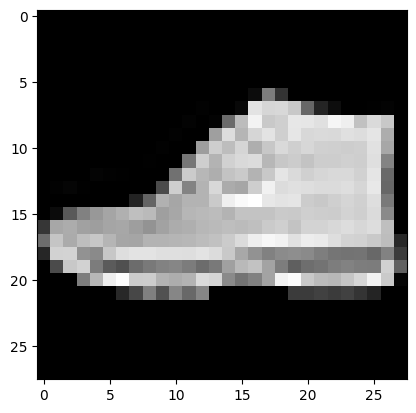

In [12]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
print(map_dress[str(int(training[i, 0]))], i)

plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image
plt.show() 

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
plt.show() 

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


In [13]:
label = training[i,0]
label

9.0

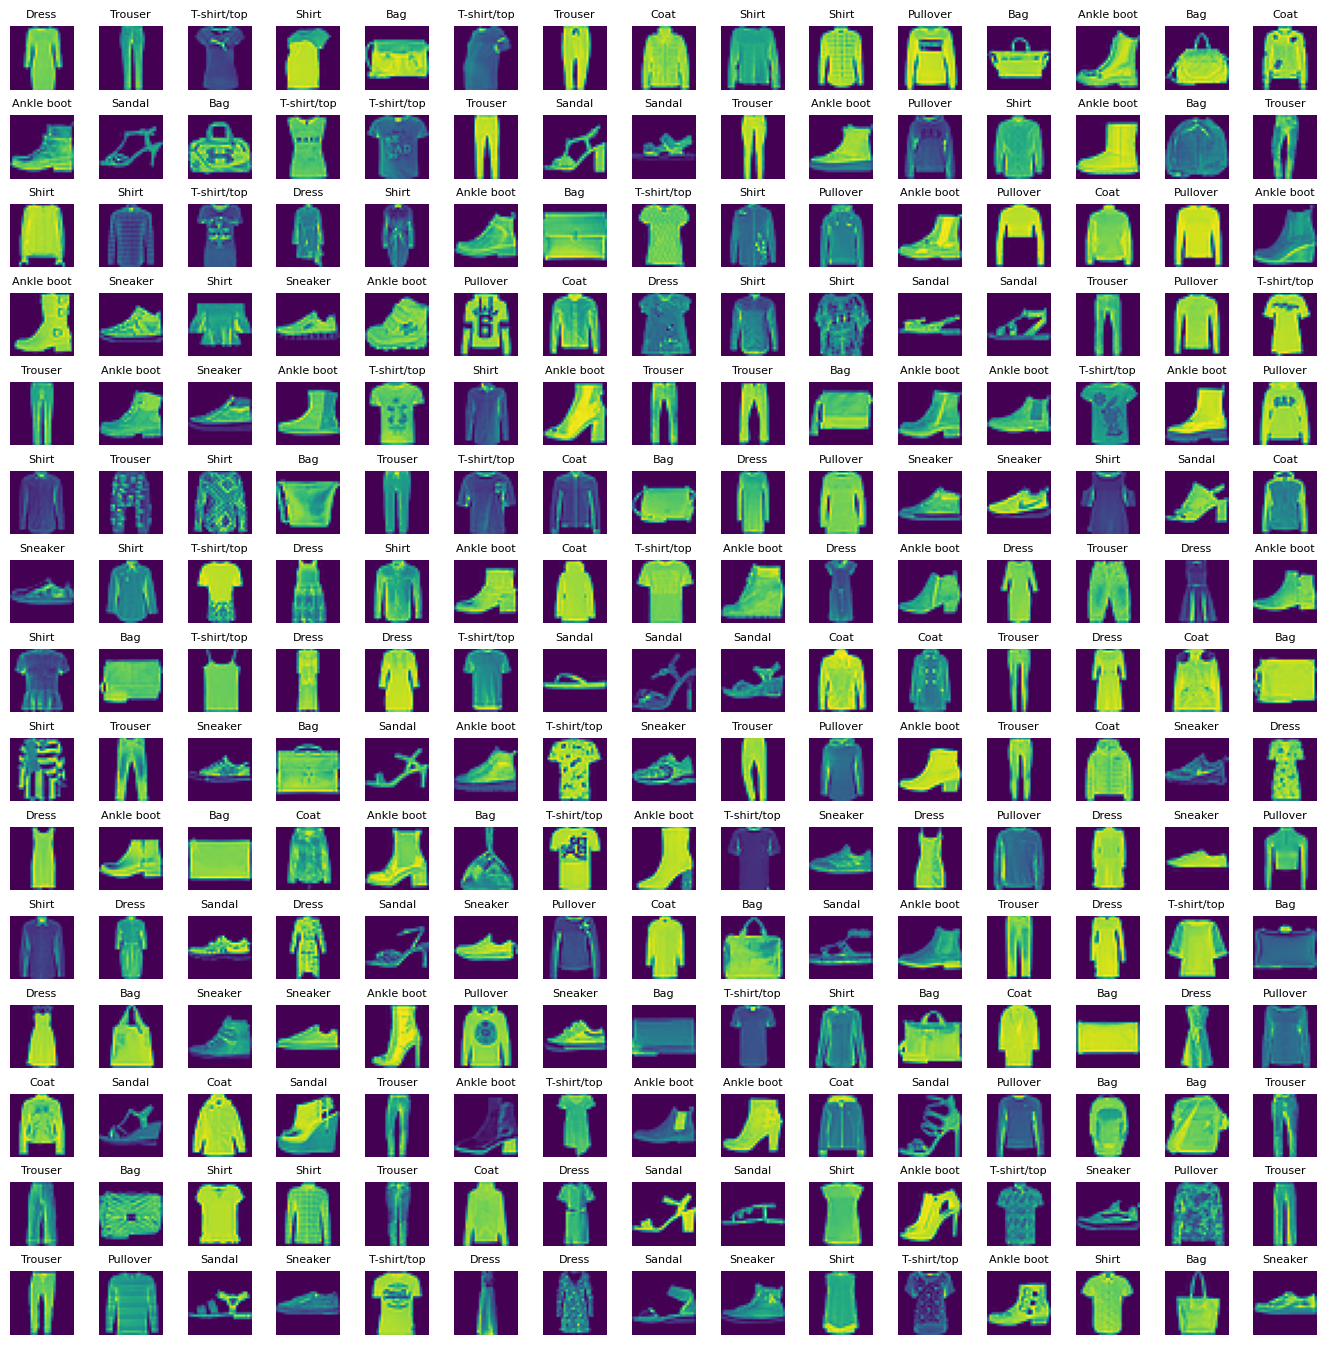

In [14]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    # axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].set_title(map_dress[str(int(training[index,0]))], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

# STEP #4: TRAINING THE MODEL

In [15]:
# Prepare the training and testing dataset
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [17]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_validate:", X_validate.shape)
print("y_validate:", y_validate.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (48000, 784)
y_train: (48000,)
X_validate: (12000, 784)
y_validate: (12000,)
X_test: (10000, 784)
y_test: (10000,)


In [18]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [19]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_validate:", X_validate.shape)
print("y_validate:", y_validate.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (48000, 28, 28, 1)
y_train: (48000,)
X_validate: (12000, 28, 28, 1)
y_validate: (12000,)
X_test: (10000, 28, 28, 1)
y_test: (10000,)


In [20]:
import keras # open source Neural network library madke our life much easier

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

In [21]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(10, activation='sigmoid'))

Conv2D(64, 3, 3, input_shape=(28, 28, 1), activation='relu'):

    64: Bu katmanda kullanılacak filtre sayısı.
    (3, 3): Filtre boyutu 3x3.
    input_shape=(28, 28, 1): Giriş verisinin boyutu, 28x28 piksel ve 1 kanal (siyah-beyaz görüntü).
    activation='relu': ReLU aktivasyon fonksiyonu kullanılıyor.

MaxPooling2D(pool_size=(2, 2)):

    Maksimum havuzlama katmanı, her 2x2 bloktaki maksimum değeri alır.
    Bu, görüntü boyutunu küçültmeye yardımcı olur ve özelliklerin öğrenilmesini sağlar.

Dropout(0.25):

    Dropout, ağı aşırı uyuma karşı korumak için kullanılır. Bu katman, rastgele seçilen bir yüzde (0.25) kadar nöronu devre dışı bırakır.

Flatten():

    Düzleştirme katmanı, önceki katmanın çıktılarını tek bir vektör haline getirir. Bu, tam bağlantılı katmanlar için giriş olarak kullanılır.

Dense(output_dim=32, activation='relu'):

    32 nöronlu tam bağlantılı (fully connected) katman. ReLU aktivasyon fonksiyonu kullanılıyor.

Dense(output_dim=10, activation='sigmoid'):

    10 nöronlu bir çıkış katmanı. Çünkü 10 sınıflı bir problem var (eğer 10 farklı sınıfa sahip bir sınıflandırma problemi ise). Sigmoid aktivasyon fonksiyonu kullanılıyor, çünkü çoklu sınıflandırma problemi varsa genellikle çıkış katmanında softmax kullanılır, ancak burada sigmoid kullanılmış.

In [23]:
cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [24]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 2s 16ms/step - loss: 1.2374 - accuracy: 0.5882 - val_loss: 0.7004 - val_accuracy: 0.7469
Epoch 2/50
94/94 [==============================] - 1s 14ms/step - loss: 0.6599 - accuracy: 0.7618 - val_loss: 0.5858 - val_accuracy: 0.7897
Epoch 3/50
94/94 [==============================] - 1s 14ms/step - loss: 0.5765 - accuracy: 0.7915 - val_loss: 0.5241 - val_accuracy: 0.8121
Epoch 4/50
94/94 [==============================] - 1s 14ms/step - loss: 0.5380 - accuracy: 0.8053 - val_loss: 0.4968 - val_accuracy: 0.8195
Epoch 5/50
94/94 [==============================] - 1s 14ms/step - loss: 0.5115 - accuracy: 0.8128 - val_loss: 0.4724 - val_accuracy: 0.8308
Epoch 6/50
94/94 [==============================] - 1s 14ms/step - loss: 0.4935 - accuracy: 0.8198 - val_loss: 0.4712 - val_accuracy: 0.8261
Epoch 7/50
94/94 [==============================] - 1s 14ms/step - loss: 0.4794 - accuracy: 0.8264 - val_loss: 0.4526 - val_accuracy: 0.8319
Epoch 8/50
94

Modeli Derleme (cnn_model.compile):

    loss='sparse_categorical_crossentropy': Eğitim sırasında kullanılacak kayıp fonksiyonu. Bu, çoklu sınıflandırma problemleri için uygun bir seçenektir, özellikle sınıflar arasında düzensiz dağılımlar varsa.

optimizer=Adam(learning_rate=0.001): 

    Optimizasyon algoritması olarak Adam optimizer'ı kullanılır. Learning rate (öğrenme oranı) 0.001 olarak belirlenmiştir.

metrics=['accuracy']: 

    Modelin performansını değerlendirmek için kullanılacak metrik. Burada sadece doğruluk (accuracy) ölçülmektedir.


Modeli Eğitme (cnn_model.fit):

    X_train, y_train: Eğitim veri seti (giriş ve etiketler).
    batch_size=512: Her bir eğitim adımında kullanılacak örnek sayısı. Bu, ağın ağırlıklarının güncellenmeden önce kullanılacak örnek sayısını belirler.
    epochs=epochs: Eğitim epok sayısı. Toplam eğitim verisinin tamamının kaç kez kullanılacağını belirler.
    verbose=1: Eğitim sırasında çıktıların gösterilme düzeyi. 1, her epokta bir çıktı gösterir; 0 ise çıktıyı göstermez.
    validation_data=(X_validate, y_validate): Modelin eğitim sırasında başarıyı değerlendirmek için kullanılacak doğrulama veri seti. Eğitim sırasında bu veri seti üzerindeki performans da izlenir ve overfitting durumları kontrol edilir.

# STEP #5: EVALUATING THE MODEL

In [25]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8767
Test Accuracy : 0.877


In [26]:
# get the predictions for the test data

# predicted_classes = cnn_model.predict_classes(X_test)

predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = predicted_probabilities.argmax(axis=-1)

313/313 [==============================] - 0s 982us/step


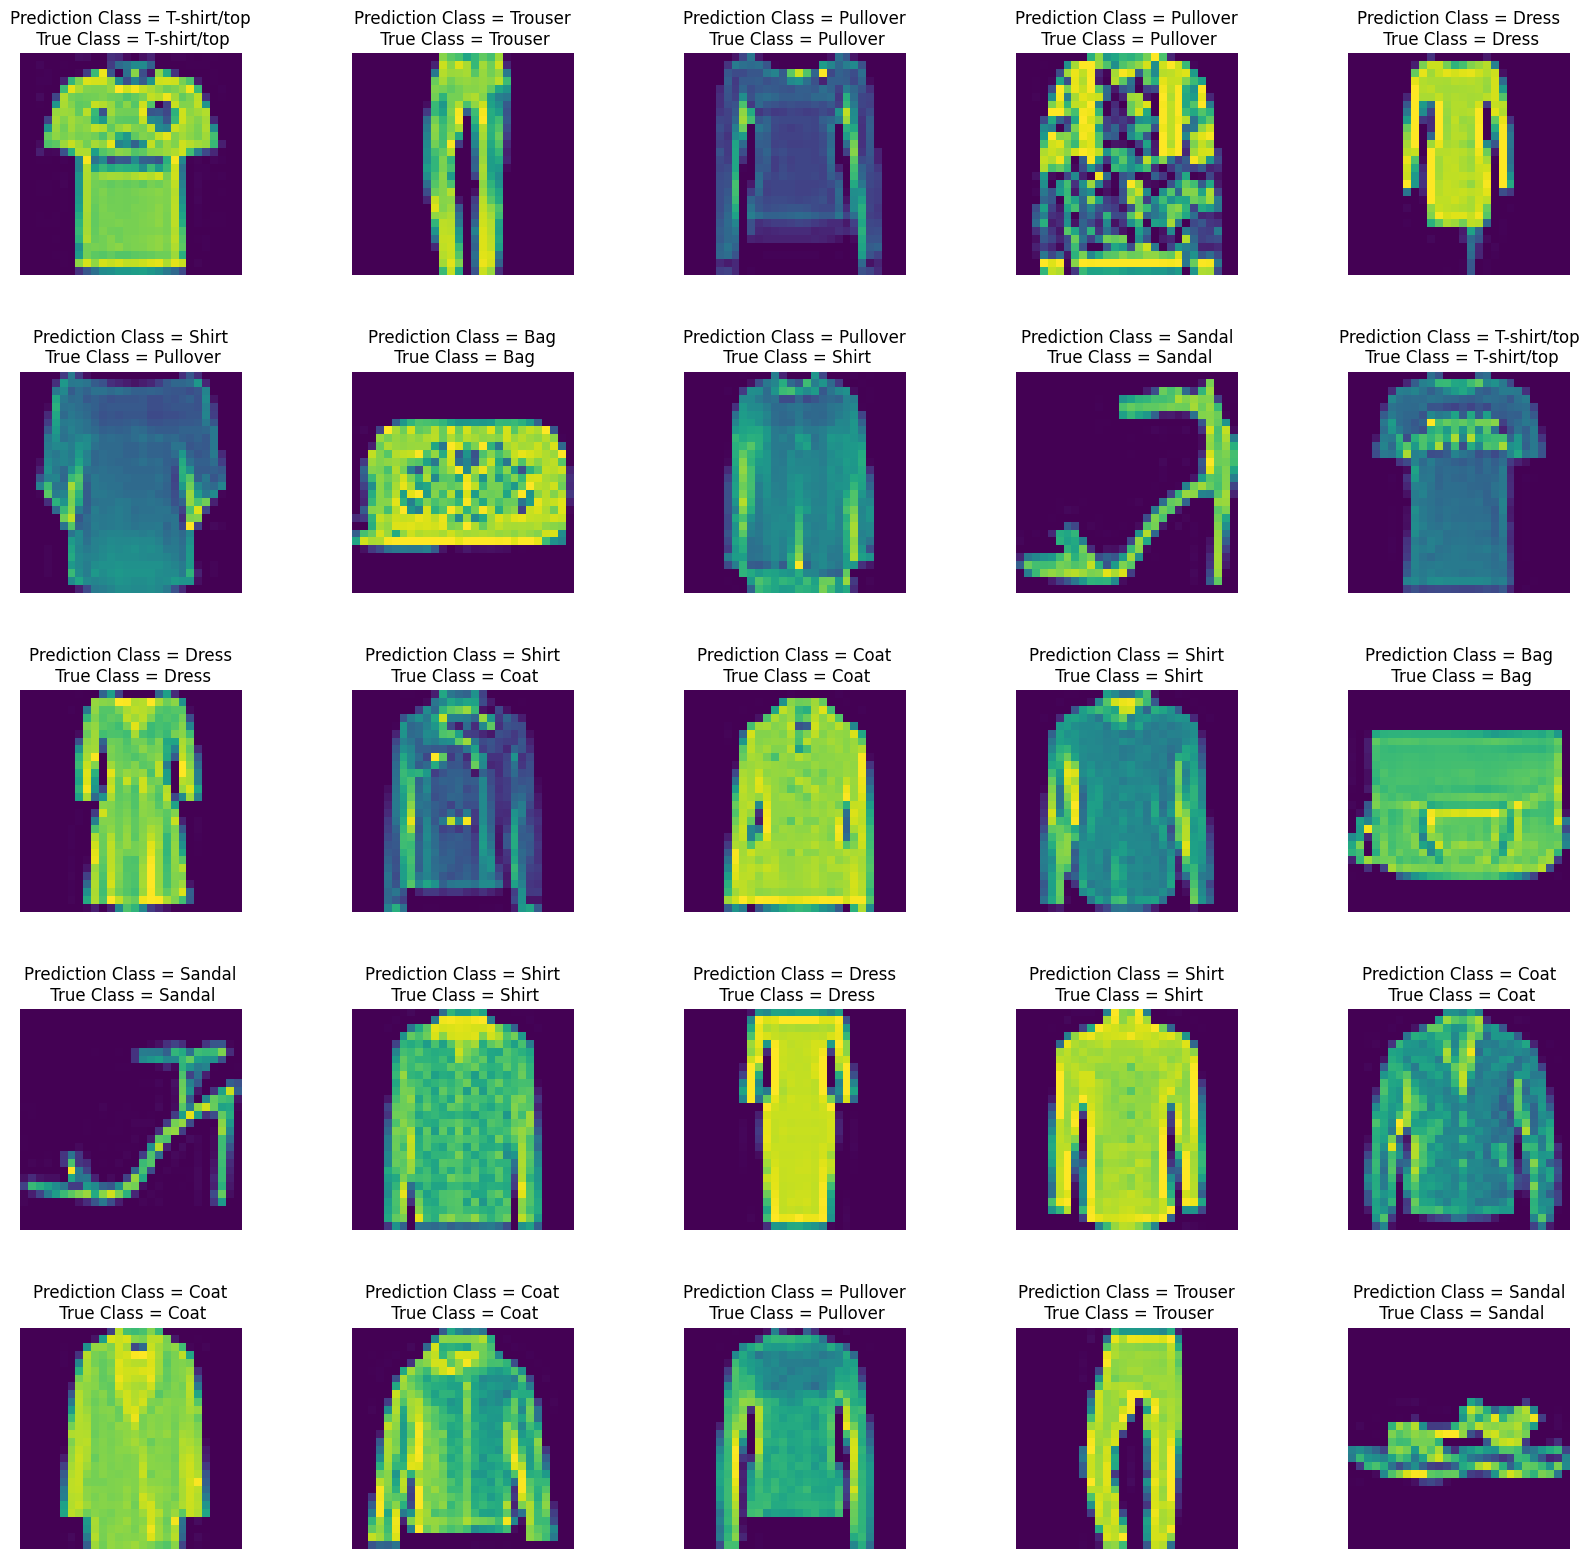

In [27]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(map_dress[str(int(predicted_classes[i]))], map_dress[str(int(y_test[i]))]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


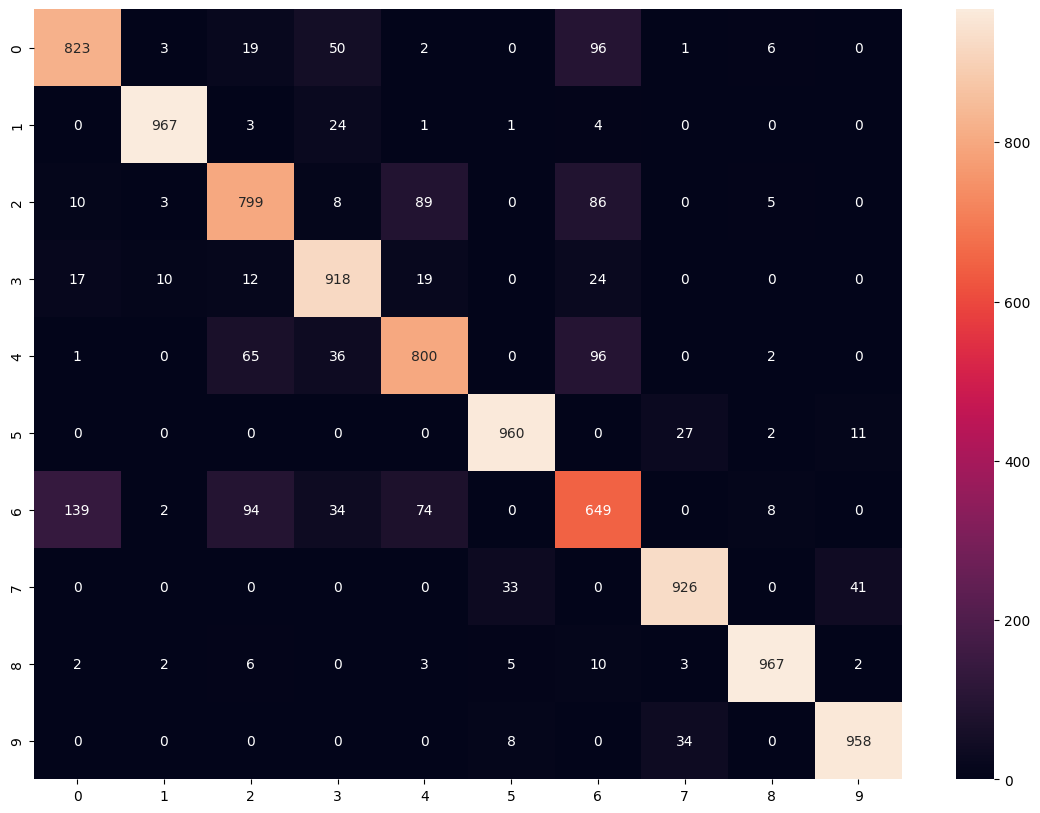

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()
# Sum the diagonal element to get the total true correct values

In [29]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {} - {:12}".format(i, map_dress[str(i)]) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

                        precision    recall  f1-score   support

Class 0 - T-shirt/top        0.83      0.82      0.83      1000
Class 1 - Trouser            0.98      0.97      0.97      1000
Class 2 - Pullover           0.80      0.80      0.80      1000
Class 3 - Dress              0.86      0.92      0.89      1000
Class 4 - Coat               0.81      0.80      0.80      1000
Class 5 - Sandal             0.95      0.96      0.96      1000
Class 6 - Shirt              0.67      0.65      0.66      1000
Class 7 - Sneaker            0.93      0.93      0.93      1000
Class 8 - Bag                0.98      0.97      0.97      1000
Class 9 - Ankle boot         0.95      0.96      0.95      1000

              accuracy                           0.88     10000
             macro avg       0.88      0.88      0.88     10000
          weighted avg       0.88      0.88      0.88     10000

